08/03/22

Author: Amalia Karalis

Collabs: Maude Lariviere, Ana Hoban, Mattias Lazda, Nick Desjardins


## 2.2
We use the equation for Power used in 2.1, but with $\nu$ and u as free parameters.

$$ P = (F_{skin}+F_{form}+F_{stokes})*u $$

where $F_{skin}$ is the skin drag on the body (turbulent regime), $F_{form}$ is the form drag on the head and $F_{stokes}$ is the stokes drag on the laminar regime of the body. We neglect the stokes drag on the head since it is much smaller than on the body and will evolve in a similar way.

Only the stokes drag depends on $\nu$, all the forces depend on u. We take P to be the power found in 2.1 (P=6.15e9 erg/s).

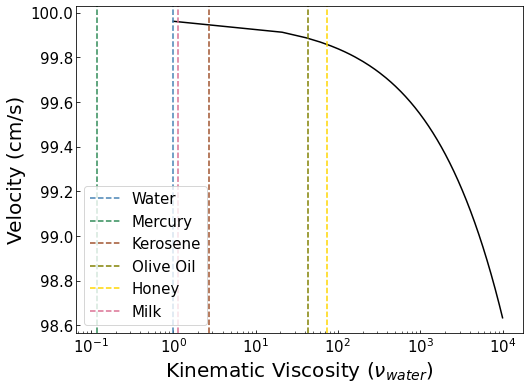

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

## 2.2

n = 500
v = np.linspace(1, 1e4, n)*0.01 # define the linspace of viscosities 
def Power(u):
    ## the power is the sum of the forces (as calculated in 2.1) times velocity
    # u is velocity, v is viscosity
    
    # define the constants (same as in 2.1)
    c_f = 1
    c_p = 1
    rho = 1 # g/cm^3
    L_t = 150 # cm
    L_l = 10 # cm
    b = 20 # cm
    
    # define the forces
    F_skin = 2*c_f*rho*u**2*L_t*b
    F_form = np.pi / 8 * c_p * rho * u**2 * b**2
    F_stokes = 4*rho * v**(1/2) * u**(3/2) * L_l**(1/2) * b

    P_i = 6.1525e9 # the power we found in 2.1
    return (F_skin+F_form+F_stokes)*u - P_i


u_guess = np.zeros(n)+100 # define a guess for u

# now we solve for u as a function of v
u_sol = fsolve(Power, u_guess)

## list some common fluid viscosities (all in terms of v_water)
# from https://www.engineersedge.com/fluid_flow/kinematic-viscosity-table.htm
v_water = 1e-6 #(in SI)
v_olive_oil = 4.32e-5/v_water
v_honey = 7.36e-5/v_water
v_kerosene = 2.71e-6/v_water
v_mercury = 1.18e-7/v_water
v_milk = 1.13e-6/v_water

# plot
plt.figure(figsize=(8,6))
plt.plot(v/0.01, u_sol, color='black')
plt.xscale('log')
plt.axvline(1, label='Water', linestyle='--', color='steelblue')
plt.axvline(v_mercury, label='Mercury', linestyle='--', color='seagreen')
plt.axvline(v_kerosene, label='Kerosene', linestyle='--', color='sienna')
plt.axvline(v_olive_oil, label='Olive Oil', linestyle='--', color='olive')
plt.axvline(v_honey, label='Honey', linestyle='--', color='gold')
plt.axvline(v_milk, label='Milk', linestyle='--', color='palevioletred')
plt.legend(loc='lower left', fontsize=15)
plt.xlabel(r'Kinematic Viscosity ($\nu_{water}$)', fontsize=20)
plt.ylabel('Velocity (cm/s)', fontsize=20)
plt.tick_params(labelsize=15, direction='in')
plt.tick_params(which='minor',labelsize=15, direction='in')
plt.show()

It makes sense that as the viscosity increases, for the same amount of power (effort), the swimmer goes more slowly. As viscosity increases, it becomes more difficult to swim since the stokes drag in greater. It also makes sense that this effect is more dramatic for larger viscosities (it starts to drop off pretty quickly) since the dependence is $\nu^{1/2}$.

## 2.3

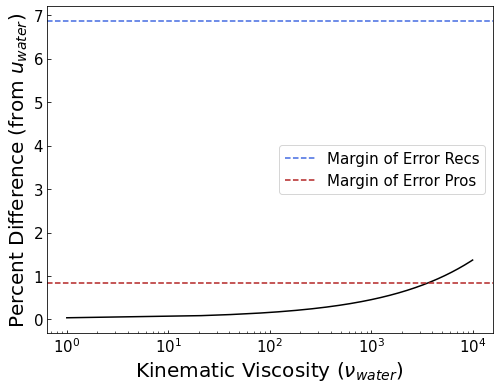

In [18]:
## 2.3
u_water = 100
percent_diff = abs(u_sol - u_water)/u_water * 100

## the variance for swim times
# for olympic athletes
# take 5 times from the mens 100m freestyle at the Tokyo Olympics
# from https://olympics.com/en/olympic-games/tokyo-2020/results/swimming/men-s-100m-freestyle
# and https://swimswam.com/olympic-results-digest-all-the-medalists-records-set-in-the-pool-in-tokyo/
u_pros = 100 / np.array([47.02, 47.08, 47.44, 47.72, 48.10])
mean_pros = np.mean(u_pros)
std_pros = np.std(u_pros)

# for recreational swimmers
# https://idswater.com/2020/08/25/how-fast-can-the-average-person-swim-100m/ says the average 100m swim is 120s
# I would say that +/- 10s is a good approximation for the standard deviation on this time
# since normal people swim at very different paces
mean_rec = 100/120
std_rec = np.std(100/np.array([110, 120, 130]))

# plot
plt.figure(figsize=(8,6))
plt.plot(v/0.01, percent_diff, color='black')
plt.axhline(std_rec/mean_rec*100, label='Margin of Error Recs', linestyle='--', color='royalblue')
plt.axhline(std_pros/mean_pros*100, label='Margin of Error Pros', linestyle='--', color='firebrick')
plt.xscale('log')
plt.legend(fontsize=15)
plt.xlabel(r'Kinematic Viscosity ($\nu_{water}$)', fontsize=20)
plt.ylabel(r'Percent Difference (from $u_{water}$)', fontsize=20)
plt.tick_params(labelsize=15, direction='in')
plt.tick_params(which='minor',labelsize=15, direction='in')
plt.show()

A viscosity of a bit more than 3 order of magnitude larger than $\nu_{water}$ (~30$\nu_{water}$) is can cause a relevant change in swiming speed for professional atheletes, where the typical margin for error is small.

However, for recreational swimmers, the difference in swimming speed for a viscosity 4 orders of magnitude larger that $\nu_{water}$ is not very significant at all. 

Most common fluids have viscosities around 1 or two order of magnitude difference from water, so unless you were to swim in a very very viscous liquid, you swimming speed would not change significantly (it would barely even make enough difference to cost an olympian the gold).

So, unless you are an olympic athlete trying to win a medal, swimming in water vs a more viscous substance does not affect your speed.